# ACOL test visualisation on pascal VOC2007

## Setup stuff

In [1]:
#imports and settings:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from jupyterthemes import jtplot
from scipy.stats import threshold
import time, os
import _init_paths
import pandas as pd
import skimage.io as io
import sys
#sys.path.append('//coco/PythonAPI/')
#from pycocotools.coco import COCO
#dataDir='//coco'
dataDir='//VOCdevkit'
dataType='val2007'
_data_path = '/VOCdevkit/VOC2007'
_image_ext = '.jpg'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
jtplot.style(grid=False)
%matplotlib inline
tf.logging.set_verbosity(tf.logging.INFO)

In [2]:
def image_path_from_index(index):
        """
        Construct an image path from the image's "index" identifier.
        """
        fileName = str(index) + str(_image_ext)
        fileName = fileName.zfill(10)
        image_path = os.path.join(_data_path, 'JPEGImages', fileName)
        assert os.path.exists(image_path), \
                'Path does not exist: {}'.format(image_path)
        return image_path

In [3]:
def vis_detections(im_id, class_name, bbox, score, thresh=0.8):
    """Visual debugging of detections."""
    #cats = coco.loadCats(coco.getCatIds())
    #classes = tuple(['__background__'] + ['__another thing__'] + [c['name'] for c in cats])
    #class_name = classes[class_name]
    #img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    im = io.imread(image_path_from_index(im_id))
    #im = im[:, :, (2, 1, 0)]
    if score > thresh:
        plt.cla()
        plt.imshow(im)
        plt.gca().add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='g', linewidth=3)
            )
        plt.gca().text(bbox[0], bbox[1] - 2,
             '{:s} {:.3f}'.format(class_name, score),
             bbox=dict(facecolor='blue', alpha=0.5),
             fontsize=14, color='white')

        plt.title('{}  {:.3f}'.format(class_name, score))
        plt.grid(False)
    plt.show()

In [4]:
pd.set_option('display.max_rows', 1000)
clustCount = 5
classCount = 80
#detections = pd.read_json('/code/ThesisProject-SCFasterRCNN9000/output/faster_rcnn_ACOL_end2end/voc_2007_test/VGGnet_fast_rcnn_iter_10002/detections_test2007_results_b8daaa24-ec61-4923-8530-610e97066d54.json')
#This one is interesting:
#detections = pd.read_json('/code/ThesisProject-SCFasterRCNN9000/output/faster_rcnn_ACOL_end2end/voc_2007_test/VGGnet_fast_rcnn_iter_200000/detections_test2007_results_a2a0bcea-ce05-41fd-9faa-f39b7fc8e4d2.json')
detections = pd.read_json('/code/ThesisProject-SCFasterRCNN9000/output/faster_rcnn_ACOL_end2end/voc_2007_test/VGGnet_fast_rcnn_iter_200000/detections_test2007_results_976d1b56-9136-4241-b2e3-ca61d84c3d2a.json')

In [5]:
detections

,bbox,category_id,cluster,image_id,score
0,"[28.5854492188, 204.226104736, 275.762268066, ...",aeroplane,1,2,0.695489
1,"[32.9129486084, 77.8213195801, 450.644119263, ...",aeroplane,1,3,0.999798
2,"[101.762191772, 148.296844482, 50.4843597412, ...",aeroplane,3,3,0.265428
3,"[93.4032669067, 335.914611816, 24.1493835449, ...",aeroplane,1,4,0.989362
4,"[100.244667053, 343.008880615, 31.4864273071, ...",aeroplane,1,4,0.818011
5,"[162.996902466, 194.22668457, 45.2842712402, 6...",aeroplane,0,8,0.361949
6,"[78.3289489746, 142.505172729, 80.8289489746, ...",aeroplane,0,8,0.251455
7,"[91.4504241943, 138.247009277, 259.351272583, ...",aeroplane,1,10,0.104523
8,"[299.443756104, 230.047836304, 28.893737793, 2...",aeroplane,0,13,0.976699
9,"[403.677001953, 184.777053833, 40.2020263672, ...",aeroplane,0,13,0.149551


## cluster spread per class

In [6]:
detections[['category_id','cluster','image_id']].groupby(['category_id', 'cluster']).count()

image_id
category_id cluster          
aeroplane   0             755
            1            2946
            2             379
            3             617
            4             298
bicycle     0            3286
            1             485
            2             531
            3             437
            4             177
bird        0             609
            1             621
            2             653
            3            2507
            4             433
boat        0             328
            1             552
            2            2909
            3             352
            4            1564
bottle      0             809
            1             911
            2            4341
            3             842
            4            1946
bus         0             447
            1             514
            2             354
            3             418
            4            2376
car         0             525
            1             708
            2             389
            3             374
            4            5014
cat         0             219
            1            2074
            2             609
            3             789
            4             506
chair       0            3767
            1            1151
            2             427
            3             652
            4            1203
cow         0             817
            1            1097
            2             546
            3            2779
            4             518
diningtable 0             391
            1             954
            2             562
            3             663
            4            2389
dog         0             589
            1             413
            2             901
            3             493
            4            2331
horse       0            3007
            1             588
            2             908
            3             837
            4             300
motorbike   0             689
            1             268
            2            3975
            3             913
            4             299
person      0             396
            1             597
            2             531
            3             185
            4           12592
pottedplant 0            1929
            1            1241
            2             327
            3             660
            4             816
sheep       0             611
            1             348
            2             576
            3             425
            4            1732
sofa        0             886
            1             309
            2            3913
            3             329
            4             604
train       0             630
            1             807
            2            1480
            3            1530
            4             538
tvmonitor   0             356
            1            1375
            2             467
            3            3317
            4             582

In [23]:
clust0=detections[(detections.category_id=='tvmonitor') & (detections.cluster==0) & (detections.score>0.5)]
clust1=detections[(detections.category_id=='tvmonitor') & (detections.cluster==1) & (detections.score>0.5)]
clust2=detections[(detections.category_id=='tvmonitor') & (detections.cluster==2) & (detections.score>0.5)]
clust3=detections[(detections.category_id=='tvmonitor') & (detections.cluster==3) & (detections.score>0.5)]
clust4=detections[(detections.category_id=='tvmonitor') & (detections.cluster==4) & (detections.score>0.5)]

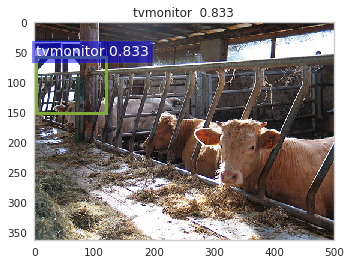

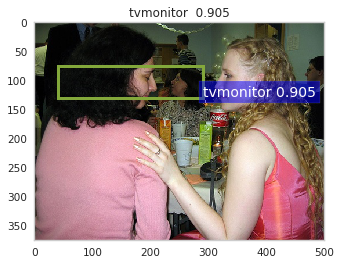

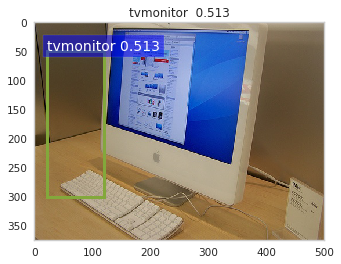

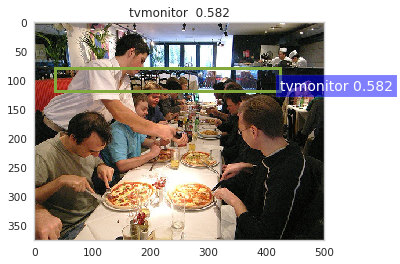

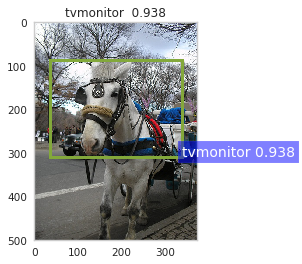

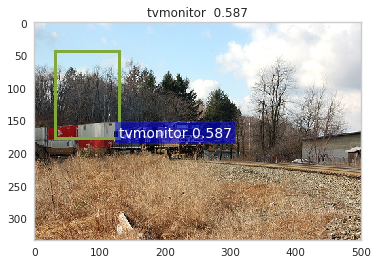

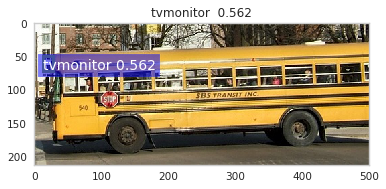

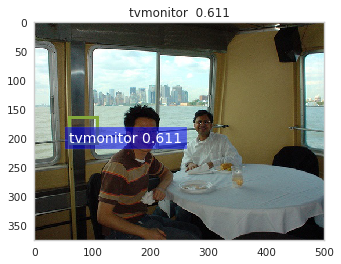

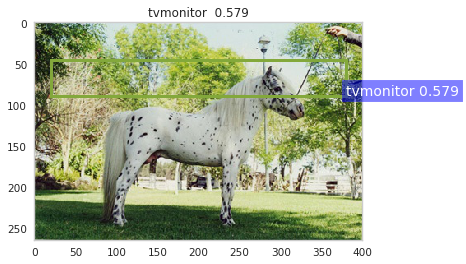

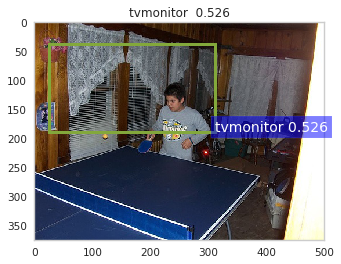

In [24]:
for i in np.random.randint(0,len(clust1),10):
    det = clust1.iloc[i]
    vis_detections(det.image_id, det.category_id, det.bbox, det.score, 0)

In [9]:
print len(clust0)
print len(clust1)
print len(clust2)
print len(clust3)
print len(clust4)

3286
485
531
437
177


In [10]:
dets=detections[(detections.category_id==25) & (detections.cluster==9) & (detections.score>0.8)]
for i in np.random.randint(0,len(dets),10):
    det = dets.iloc[i]
    vis_detections(det.image_id, det.category_id, det.bbox, det.score, 0)

ValueError: low >= high